# Mnist Classifier using RNN LSTM Cells
Source: https://www.tensorflow.org/guide/keras/rnn

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

batchSize = 64
inputDim = 28
units = 64
outputSize = 10

lstmLayer = layers.RNN(layers.LSTMCell(units), input_shape=(None, inputDim))
# lstmLayer = layers.LSTM(units, input_shape=(None, inputDim))

model = tf.keras.Sequential(name='rnn_model')
model.add(lstmLayer)
model.add(layers.BatchNormalization())
model.add(layers.Dense(outputSize, activation='softmax'))

model.summary()

Model: "rnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_1 (RNN)                  (None, 64)                23808     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 24,714
Trainable params: 24,586
Non-trainable params: 128
_________________________________________________________________


In [9]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

model.fit(x_train,y_train, validation_data=(x_test, y_test),
         batch_size=batchSize, epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 243us/sample - loss: 0.9446 - accuracy: 0.6990 - val_loss: 0.5266 - val_accuracy: 0.8317
Epoch 2/5
60000/60000 [==============================] - 16s 259us/sample - loss: 0.3964 - accuracy: 0.8822 - val_loss: 0.2755 - val_accuracy: 0.9139
Epoch 3/5
60000/60000 [==============================] - 16s 271us/sample - loss: 0.2540 - accuracy: 0.9234 - val_loss: 0.2612 - val_accuracy: 0.9174
Epoch 4/5
60000/60000 [==============================] - 13s 218us/sample - loss: 0.1986 - accuracy: 0.9395 - val_loss: 0.3199 - val_accuracy: 0.8899
Epoch 5/5
60000/60000 [==============================] - 13s 210us/sample - loss: 0.1667 - accuracy: 0.9495 - val_loss: 0.2168 - val_accuracy: 0.9286


Predicted result is: [9], target result is: 9


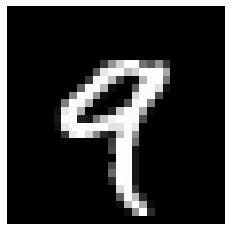

In [11]:
sample, sample_label = x_train[4], y_train[4]
result = tf.argmax(model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)

plt.imshow(sample, cmap=plt.get_cmap('gray'))
plt.axis("off")

print('Predicted result is: %s, target result is: %s' % (result.numpy(), sample_label))